In [289]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np
from scipy import stats

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# To preprocess the data
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder, MinMaxScaler


# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks

from sklearn.ensemble import RandomForestClassifier,  RandomForestRegressor
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,precision_score, classification_report, mean_absolute_error,mean_squared_error,r2_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

In [290]:
# load the data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [291]:
df_train.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [292]:
df_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [293]:
print("Shape of df_train:", df_train.shape)
print("Shape of df_test:", df_test.shape)


Shape of df_train: (891, 12)
Shape of df_test: (418, 11)


In [294]:
# basic information of the train data
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


>* Train data have `891` Rows and `12` columns 

In [295]:
# basic information of the test data
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


>* Teat data have `418` Rows and `11` columns 

In [296]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [297]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [298]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [299]:
# check value count of Survived 
print(df_train['Survived'].value_counts())
print("----------Train Data----------")


0    549
1    342
Name: Survived, dtype: int64
----------Train Data----------


In [300]:
#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", df_train["Survived"][df_train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", df_train["Survived"][df_train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", df_train["Survived"][df_train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


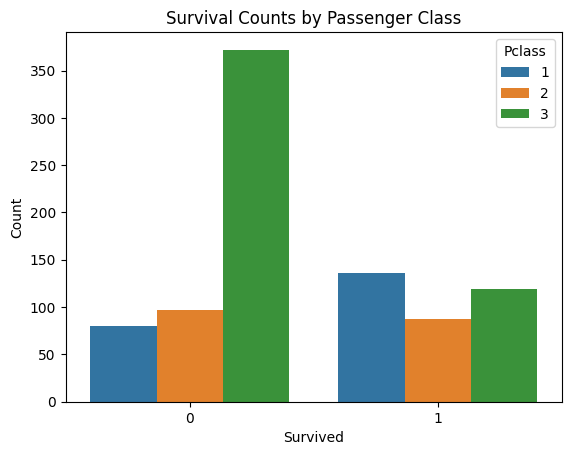

In [301]:
# Plot of survival counts grouped by passenger class
sns.countplot(data=df_train, x='Survived', hue='Pclass')
plt.title('Survival Counts by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


Count of females who survived: 233
Count of females who did not survive: 81
--------------------------------------------
Count of males who survived: 109
Count of males who did not survive: 468


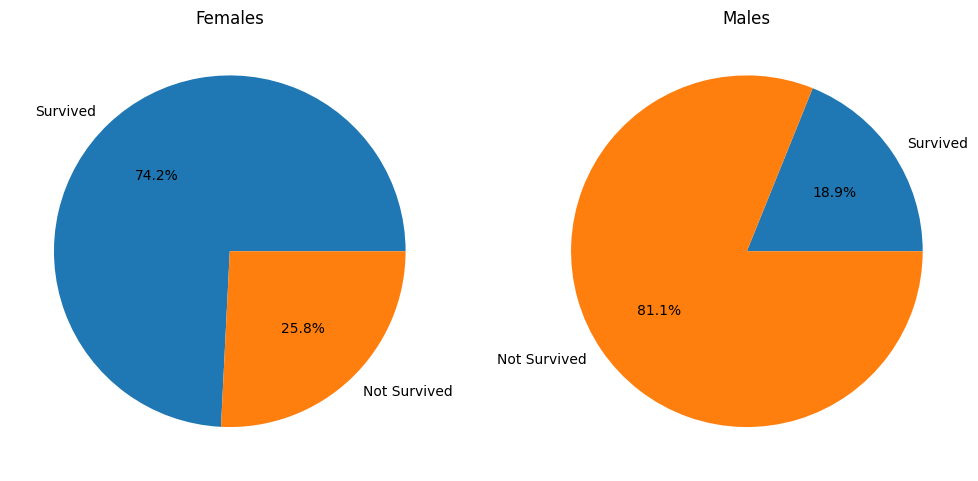

In [302]:
def count_survival_by_gender(df, gender):
    survived_count = df[(df['Sex'] == gender) & (df['Survived'] == 1)].shape[0]
    not_survived_count = df[(df['Sex'] == gender) & (df['Survived'] == 0)].shape[0]
    return survived_count, not_survived_count

female_survived_count, female_not_survived_count = count_survival_by_gender(df_train, 'female')
male_survived_count, male_not_survived_count = count_survival_by_gender(df_train, 'male')

print("Count of females who survived:", female_survived_count)
print("Count of females who did not survive:", female_not_survived_count)
print("--------------------------------------------")
print("Count of males who survived:", male_survived_count)
print("Count of males who did not survive:", male_not_survived_count)

# plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
labels = ['Survived', 'Not Survived']
sizes = [female_survived_count, female_not_survived_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Females')

# Pie plot for males
plt.subplot(1, 2, 2)
sizes = [male_survived_count, male_not_survived_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Males')

plt.tight_layout()
plt.show()

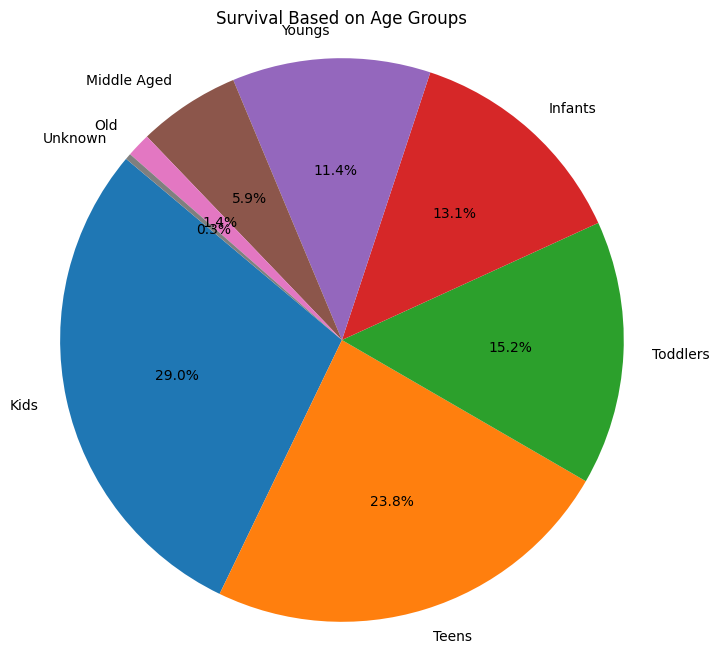

In [303]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_train contains the necessary data

# Define age groups
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['Infants', 'Toddlers', 'Kids', 'Teens', 'Youngs', 'Middle Aged', 'Old', 'Unknown']  # Add 'Unknown' for values outside the defined bins
# Categorize ages into groups
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=age_bins, labels=age_labels)

# Count survivors in each age group
survivors_by_age_group = df_train[df_train['Survived'] == 1]['AgeGroup'].value_counts()
# test data
# Define age groups
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['Infants', 'Toddlers', 'Kids', 'Teens', 'Youngs', 'Middle Aged', 'Old', 'Unknown']  # Add 'Unknown' for values outside the defined bins
# Categorize ages into groups
df_test['AgeGroup'] = pd.cut(df_test['Age'], bins=age_bins, labels=age_labels)

# Count survivors in each age group
survivors_by_age_group = df_train[df_train['Survived'] == 1]['AgeGroup'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(survivors_by_age_group, labels=survivors_by_age_group.index, autopct='%1.1f%%', startangle=140)
plt.title('Survival Based on Age Groups')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


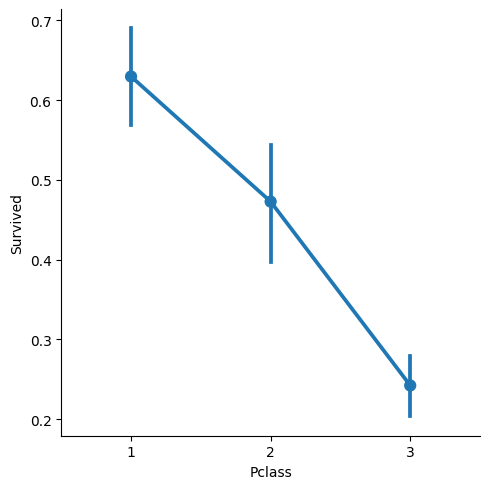

In [304]:
sns.catplot(x='Pclass', y='Survived', data=df_train, kind='point')
plt.show()

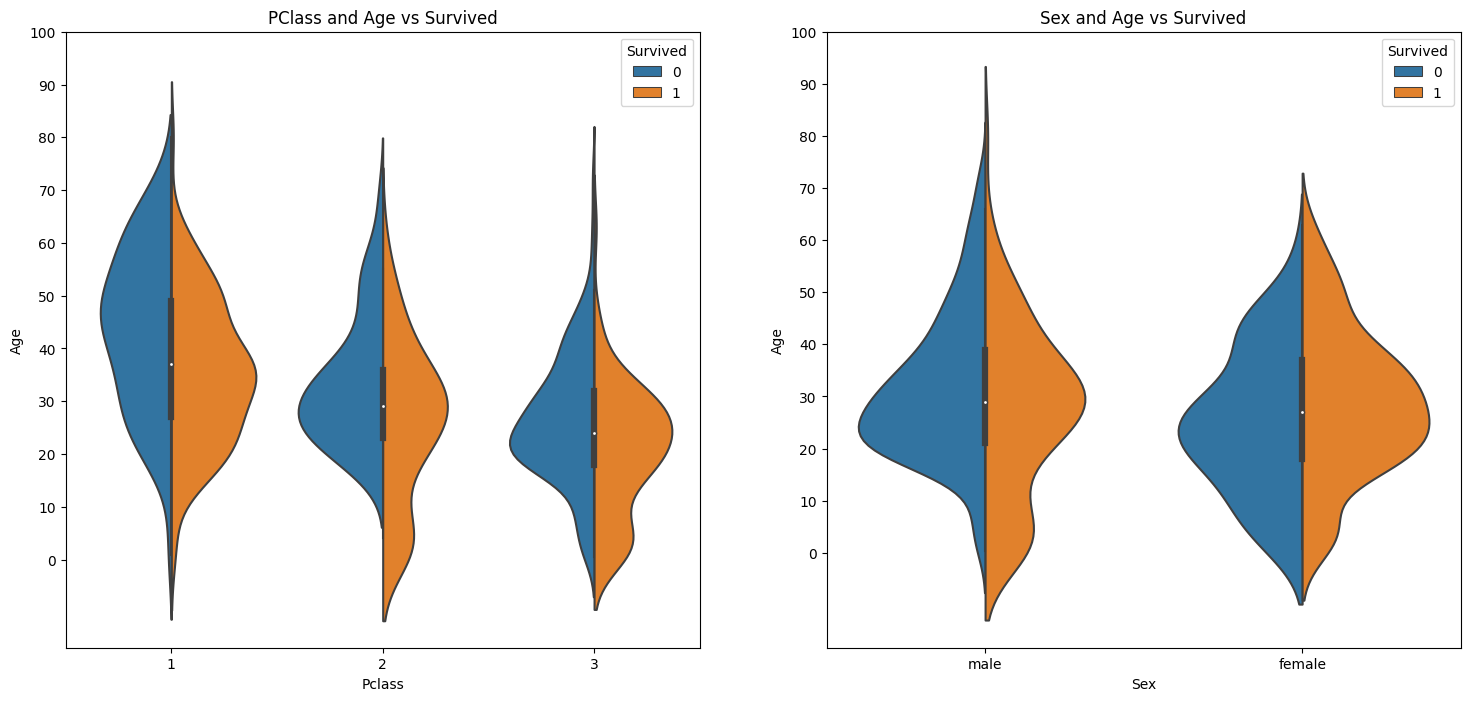

In [305]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Violin plot for Pclass and Age vs Survived
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, split=True, ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

# Violin plot for Sex and Age vs Survived
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()


From above violen plots, following observations are clear, 1) The no of children is increasing from Class 1 to 3, the number of children in Class 3 is greater than other two. 2) Survival rate of children, for age 10 and below is good irrespective of Class 3) Survival rate between age 20-30 is well and is quite better for women.

Now, in Age feature we have 177 null values filled with NaN. We have to deal with it. But we can't enter mean of age in every NaN column, because our average/mean is 29 and we cannot put 29 for a child or some olde man. So we have to discover something better. Let's do something more interesting with dataset by exploring more.

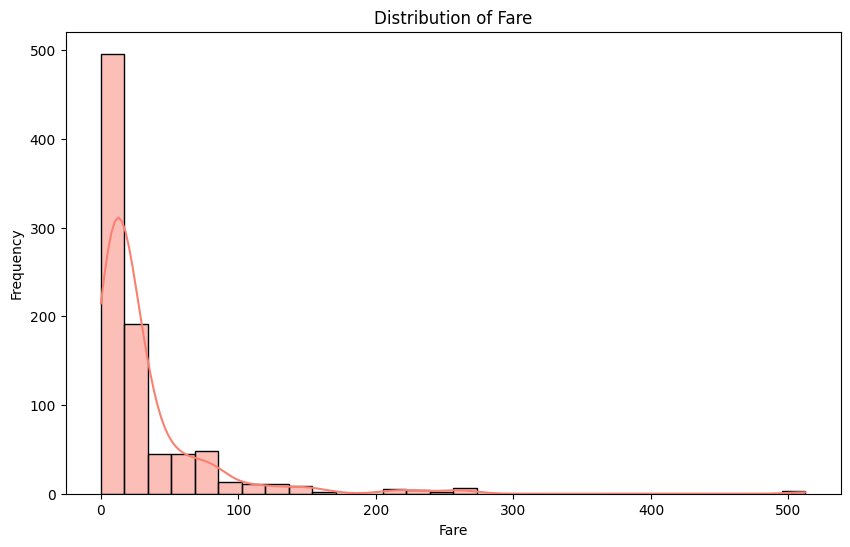

In [306]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Fare'].dropna(), bins=30, kde=True, color='salmon')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

In [307]:
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143
Percentage of SibSp = 3 who survived: 25.0
Percentage of SibSp = 4 who survived: 16.666666666666664


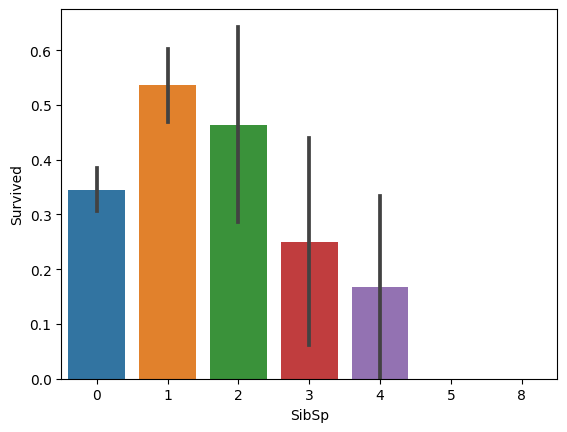

In [308]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=df_train)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", df_train["Survived"][df_train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", df_train["Survived"][df_train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", df_train["Survived"][df_train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 3 who survived:", df_train["Survived"][df_train["SibSp"] == 3].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 4 who survived:", df_train["Survived"][df_train["SibSp"] == 4].value_counts(normalize = True)[1]*100)


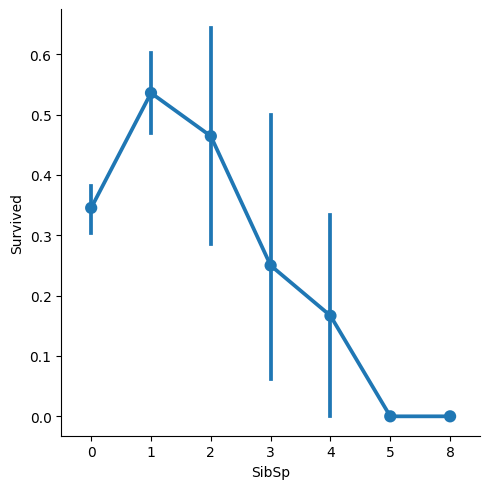

In [309]:
sns.catplot(x='SibSp', y='Survived', data=df_train, kind='point')
plt.show()

>* It's clear that people with more siblings or spouses aboard were less likely to survive.

In [310]:
# scatter plot age and fare base on survived in plotly
fig = px.scatter(df_train, x='Age', y='Fare', color='Survived', title='Age vs Fare')
fig.show()

<Axes: >

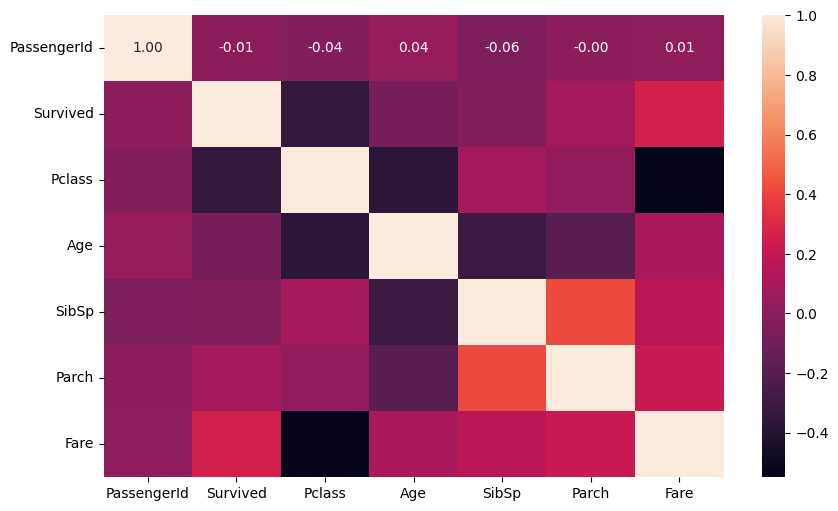

In [311]:
correlation_matrix = df_train.corr(numeric_only = True)
plt.figure(figsize=(10, 6)) 
sns.heatmap(correlation_matrix, annot =  True, fmt = ".2f")

<Axes: >

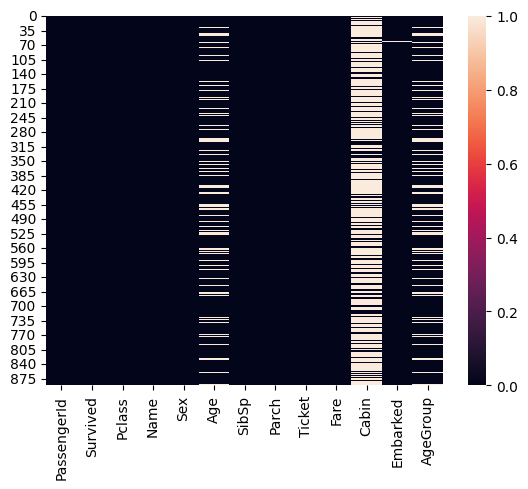

In [312]:
sns.heatmap(df_train.isnull())


In [313]:
# check null values in train data by using pandas
df_train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
AgeGroup       177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

`IN TRAIN DATA`
>* `Cabin column` have `687` missing values
>* `Age column` have `177` missing values
>* `Embarkd column` have `2` missing values

<Axes: >

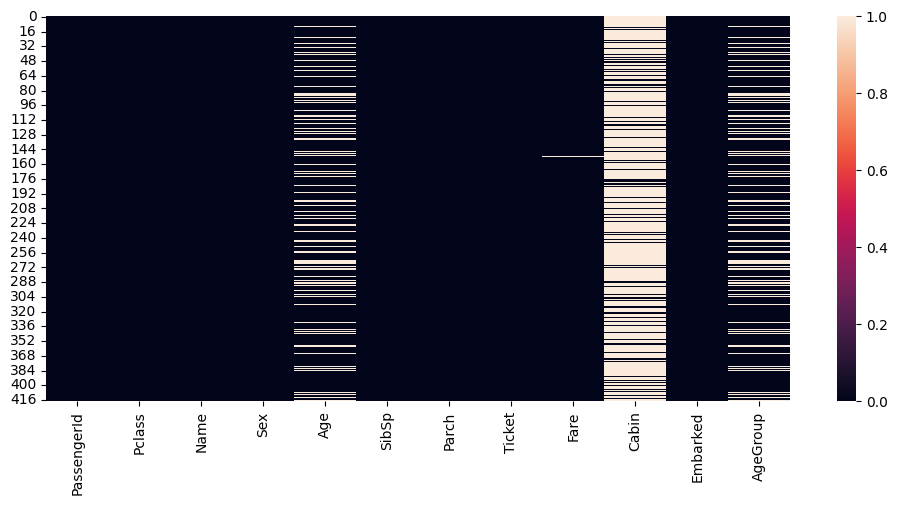

In [314]:
# check null values of test data by graphically

plt.figure(figsize=(12,5))
sns.heatmap(df_test.isnull())

In [315]:
# check null values in test data by using pandas
df_test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
AgeGroup        86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

`IN TEST DATA`
>* `Cabin column` have `327` missing values
>* `Age column` have `86` missing values
>* `Fare column` have `1` missing values


In [316]:
# percentage of null values
percentage=(df_train.isnull().sum().sort_values(ascending=False)/len(df_train))*100
percentage

Cabin          77.104377
Age            19.865320
AgeGroup       19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [317]:
# percentage of null values
percentage=(df_test.isnull().sum().sort_values(ascending=False)/len(df_train))*100
percentage

Cabin          36.700337
Age             9.652076
AgeGroup        9.652076
Fare            0.112233
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Embarked        0.000000
dtype: float64

In [318]:
missing_data_cols = df_train.isnull().sum()[df_train.isnull().sum() > 0].index.tolist()
print("Columns  of missing values in train data :",missing_data_cols)

Columns  of missing values in train data : ['Age', 'Cabin', 'Embarked', 'AgeGroup']


In [319]:
# Cabin column  in train data have highest missing values so removed
df_train.drop('Cabin', axis=1, inplace=True)

In [320]:
# Age column  in train data has replace with mean value
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

In [321]:
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'], drop_first=True)

In [322]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   AgeGroup     714 non-null    category
 10  Sex_male     891 non-null    uint8   
 11  Embarked_Q   891 non-null    uint8   
 12  Embarked_S   891 non-null    uint8   
dtypes: category(1), float64(2), int64(5), object(2), uint8(3)
memory usage: 66.6+ KB


> * `Cabin` have more than `50%` missing values in `train data` so removed from data

In [323]:
# Remove outliers from Age column in train data removed outliers greater than 70
df_train = df_train[df_train['Age'] < 70]
# remove outliers from Fare column in train data removed outliers greater than 500
df_train = df_train[df_train['Fare'] < 500]

In [324]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,AgeGroup,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Kids,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,Teens,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Kids,0,0,1


In [325]:
df_train.drop(['PassengerId', 'Ticket','Name'], axis=1, inplace=True)

In [326]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_train.drop(['Survived','AgeGroup'], axis=1))

In [327]:
y = df_train['Survived']

In [328]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2, random_state=42)


In [329]:
def evaluate_model(model_name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print the results
    print(f" {model_name} Model:")
    print("Test Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision Score:", precision)
    print("------------------------------------------")
    print("Confusion Matrix:", conf_matrix)
    
    return conf_matrix

In [330]:
def plot_heatmap(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [331]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [332]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7627118644067796

In [333]:
conf_matrix = evaluate_model('Logistic Regression',y_test,y_pred)

 Logistic Regression Model:
Test Accuracy: 0.7627118644067796
F1 Score: 0.7162162162162162
Precision Score: 0.7066666666666667
------------------------------------------
Confusion Matrix: [[82 22]
 [20 53]]


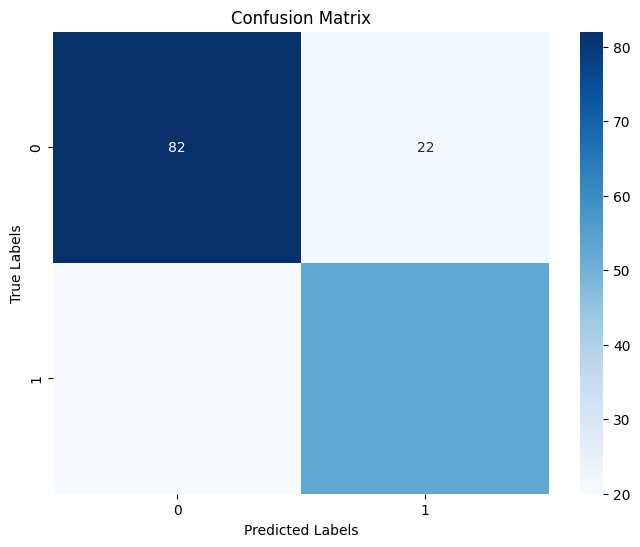

In [334]:
plot_heatmap(conf_matrix)

In [335]:
# Predict probabilities on the test set
y_proba = lr.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve, auc
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

roc_auc


0.8347602739726028

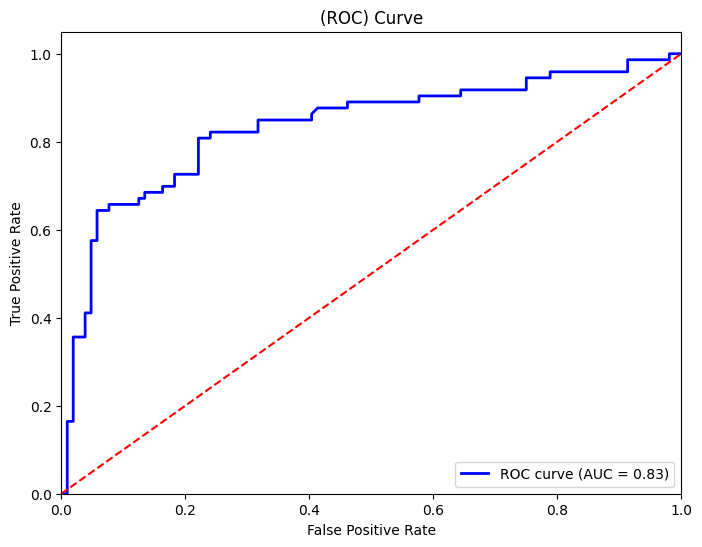

In [336]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [337]:
from sklearn.decomposition import PCA

In [338]:
df_train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,AgeGroup,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,Kids,1,0,1
1,1,1,38.0,1,0,71.2833,Teens,0,0,0
2,1,3,26.0,0,0,7.9250,Kids,0,0,1


In [339]:
features = df_train.drop(['Survived','AgeGroup'], axis=1).columns
features

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [340]:
pca = PCA()
components = pca.fit_transform(df_train[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(3),
    color=df_train['Survived']
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [341]:
# Model with PCA
pca = PCA(n_components=3)  # Specify the number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lr_with_pca = LogisticRegression()
lr_with_pca.fit(X_train_pca, y_train)
y_pred_with_pca = lr_with_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_with_pca)
accuracy_with_pca

0.7175141242937854

In [342]:
confus_matrix_pca = evaluate_model('PCA_Linear Regression',y_test,y_pred_with_pca)

 PCA_Linear Regression Model:
Test Accuracy: 0.7175141242937854
F1 Score: 0.5967741935483871
Precision Score: 0.7254901960784313
------------------------------------------
Confusion Matrix: [[90 14]
 [36 37]]


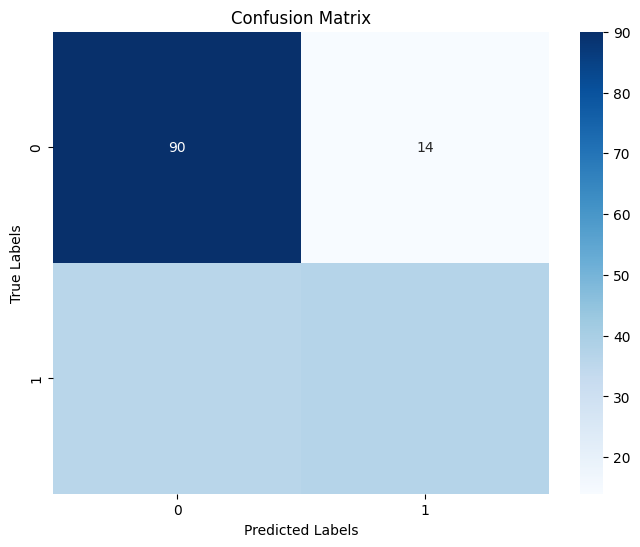

In [343]:
plot_heatmap(confus_matrix_pca)

In [344]:
print(f'Accuracy without PCA: {accuracy}')
print(f'Accuracy with PCA: {accuracy_with_pca}')

Accuracy without PCA: 0.7627118644067796
Accuracy with PCA: 0.7175141242937854


In [345]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score

# Define the pipeline with a scaler and the random forest classifier
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', XGBClassifier(random_state=42))
])

# Define the hyperparameters for grid search
params = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.05, 0.1, 0.5]
}

# Perform grid search using the pipeline and parameters
clf = GridSearchCV(pipeline, params, cv=5)
clf.fit(X_train, y_train)

# Get the best model and its parameters
model = clf.best_estimator_
model.fit(X_train, y_train)
y_pred_xgboost = model.predict(X_test)


In [346]:
conf_matrix_xgboost = evaluate_model("XGBoost Classifier",y_test,y_pred_xgboost)

 XGBoost Classifier Model:
Test Accuracy: 0.807909604519774
F1 Score: 0.7384615384615385
Precision Score: 0.8421052631578947
------------------------------------------
Confusion Matrix: [[95  9]
 [25 48]]


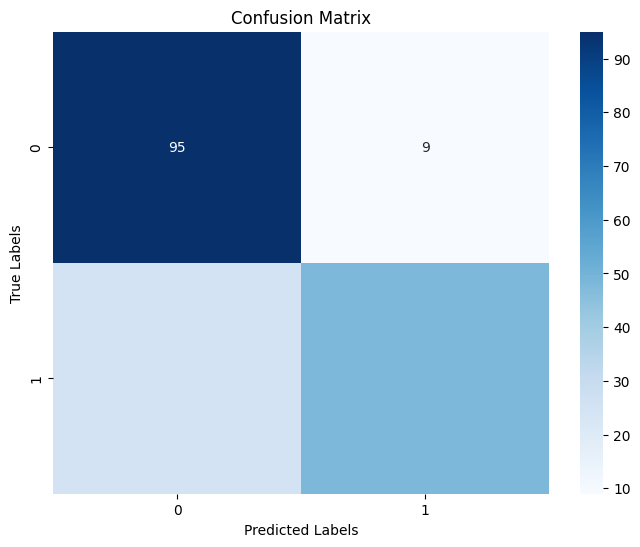

In [347]:
plot_heatmap(conf_matrix_xgboost)

In [348]:
# Predict probabilities on the test set
y_proba = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve, auc
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

roc_auc

0.8551106427818757

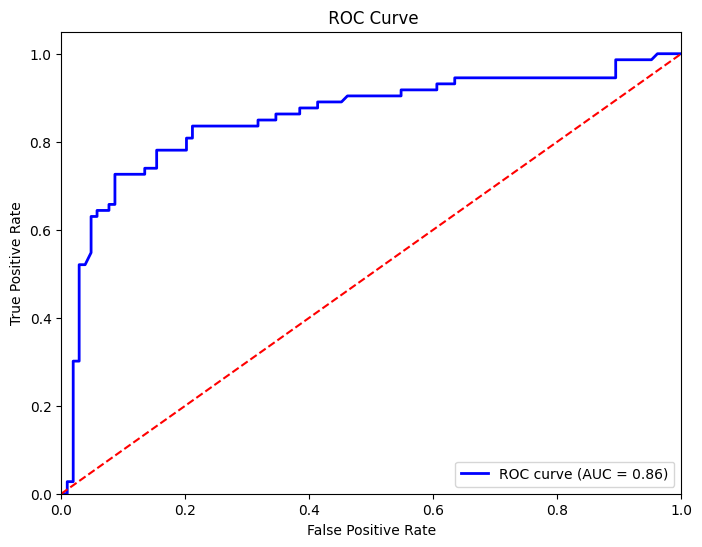

In [349]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [350]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, f1_score, precision_score, accuracy_score

# Define the pipeline with a scaler and the random forest classifier
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the hyperparameters for grid search
params = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30]
}

# Perform grid search using the pipeline and parameters
clf = GridSearchCV(pipeline, params, cv=5)
clf.fit(X_train, y_train)

# Get the best model and its parameters
best_model = clf.best_estimator_
best_model.fit(X_train, y_train)
y_pred_rf = best_model.predict(X_test)




In [351]:
confusion_matrix_rfc = evaluate_model(" Random Forest Classifier",y_test,y_pred_rf)

  Random Forest Classifier Model:
Test Accuracy: 0.8192090395480226
F1 Score: 0.7611940298507464
Precision Score: 0.8360655737704918
------------------------------------------
Confusion Matrix: [[94 10]
 [22 51]]


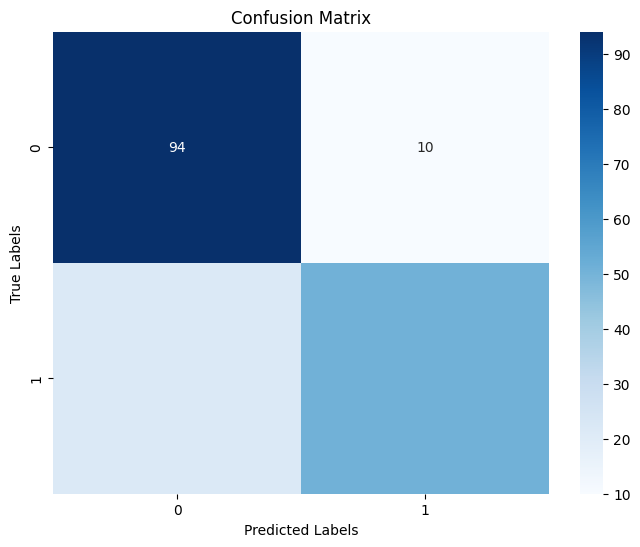

In [352]:
plot_heatmap(confusion_matrix_rfc)

In [353]:
# Predict probabilities on the test set
y_proba = best_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_curve, auc
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

roc_auc

0.8720363540569019

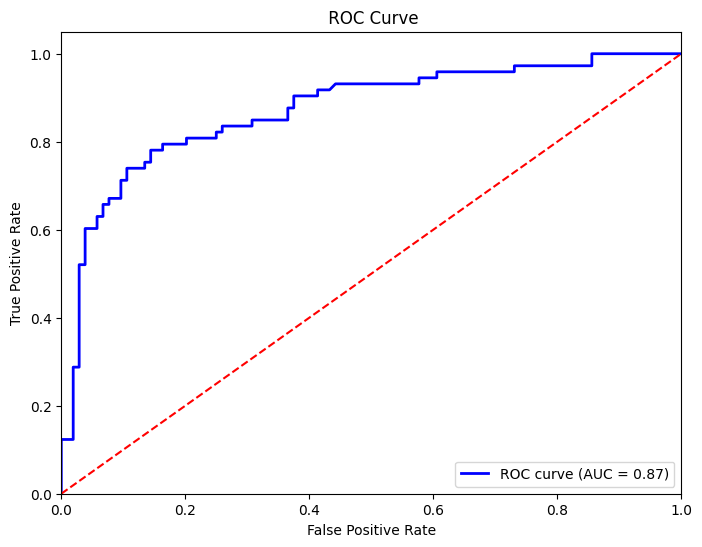

In [354]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [355]:
import eli5
# Assuming model is your trained model
features= ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q','Embarked_S']
perm = PermutationImportance(lr).fit(scaled_features, y)
eli5.show_weights(perm, feature_names=features)


Weight,Feature
0.2254 ± 0.0261,Sex_male
0.0763 ± 0.0077,Pclass
0.0107 ± 0.0128,Age
0.0045 ± 0.0099,SibSp
-0.0007 ± 0.0034,Embarked_Q
-0.0009 ± 0.0026,Parch
-0.0018 ± 0.0031,Fare
-0.0020 ± 0.0017,Embarked_S
